In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

PAST_DAYSas = 120

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(PAST_DAYS, 1258):
    X_train.append(training_set_scaled[i-PAST_DAYS:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
(3171, 100, 1)


# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# # Initialising the RNN
# regressor = Sequential()

# # Adding the first LSTM layer and some Dropout regularisation
# regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

# regressor.add(Dense(units = 1))

# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - PAST_DAYS:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

print(inputs.shape)

# X_test = []
# for i in range(PAST_DAYS, PAST_DAYS+20):
#     X_test.append(inputs[i-PAST_DAYS:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# # Visualising the results
# plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
# plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
# plt.title('Google Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
# plt.legend()
# plt.show()
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(X_train)
# print(X_test)
# print(y_train)

(1258, 1)
(120, 1)


In [146]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

appleData = pd.read_csv("AAPL.csv", parse_dates=["Date"])
appleData["Date"] = pd.to_datetime(appleData["Date"])
training_set = appleData.iloc[:, 1:2].values

PAST_DAYS = 100

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

appleDataSet = []
for i in range(PAST_DAYS, 3271):
    appleDataSet.append(training_set_scaled[i-PAST_DAYS:i, 0])

appleDataSet = np.array(appleDataSet)
# Reshaping
appleDataSet = np.reshape(appleDataSet, (appleDataSet.shape[0], appleDataSet.shape[1], 1))
totalSize = appleDataSet.shape[0]
print(int(totalSize * 0.7))

x_train, y_train = appleDataSet[:int(totalSize * 0.7), :PAST_DAYS], appleDataSet[:int(totalSize * 0.7), -1]
x_valid, y_valid = appleDataSet[int(totalSize * 0.7):int(totalSize * 0.9), :PAST_DAYS], appleDataSet[int(totalSize * 0.7):int(totalSize * 0.9), -1]
x_test, y_test = appleDataSet[int(totalSize * 0.9):, :PAST_DAYS], appleDataSet[int(totalSize * 0.9):, -1]


print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)



2219
x_train shape: (2219, 100, 1)
y_train shape: (2219, 1)
x_valid shape: (634, 100, 1)
y_valid shape: (634, 1)
x_test shape: (318, 100, 1)
y_test shape: (318, 1)


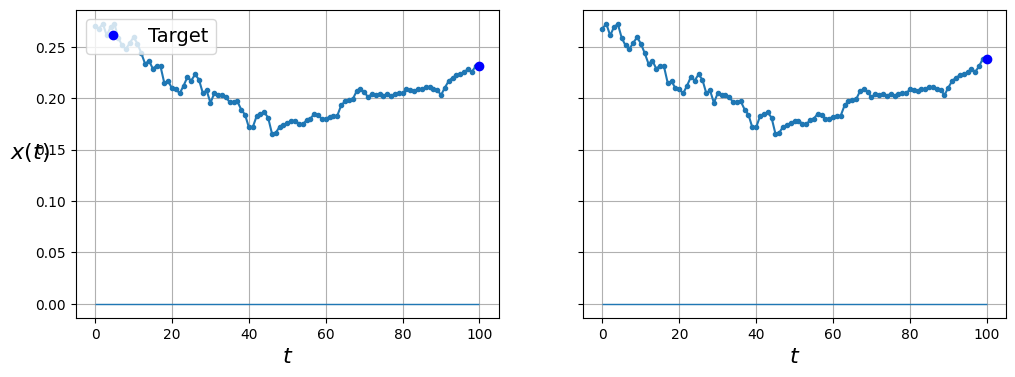

In [153]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(PAST_DAYS, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(PAST_DAYS, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 4))
for col in range(2):
    plt.sca(axes[col])
    plot_series(x_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))

plt.show()

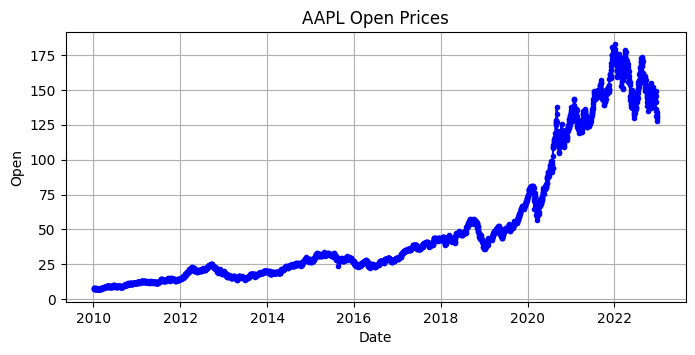

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming dfs["AAPL"] is your DataFrame containing stock data

# Set the specific start date
start_date = pd.to_datetime("2010-01-04")

# Filter the DataFrame to include data from the start date onwards
filtered_data = appleData[appleData["Date"] >= "2010-01-04"]

# Plot the filtered data
plt.figure(figsize=(8, 3.5))
plt.plot(filtered_data["Date"], filtered_data["Open"], marker=".", linestyle="-", color="b")
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("AAPL Open Prices")

plt.show()

In [154]:
Simple_Model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[100, 1]),
    keras.layers.Dense(1)
])

Simple_Model.compile(loss="mse", optimizer="adam")
Simple_History = Simple_Model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
70/70 [==============================] - 1s 6ms/step - loss: 3.1652e-04 - val_loss: 0.0034
Epoch 2/20
70/70 [==============================] - 0s 5ms/step - loss: 1.3155e-04 - val_loss: 0.0026
Epoch 3/20
70/70 [==============================] - 0s 5ms/step - loss: 1.0163e-04 - val_loss: 0.0019
Epoch 4/20
70/70 [==============================] - 0s 7ms/step - loss: 9.3837e-05 - val_loss: 0.0018
Epoch 5/20
70/70 [==============================] - 0s 4ms/step - loss: 8.0059e-05 - val_loss: 0.0015
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 7.8755e-05 - val_loss: 0.0018
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 7.2013e-05 - val_loss: 0.0014
Epoch 8/20
70/70 [==============================] - 0s 3ms/step - loss: 7.0146e-05 - val_loss: 0.0013
Epoch 9/20
70/70 [==============================] - 0s 3ms/step - loss: 6.8829e-05 - val_loss: 0.0013
Epoch 10/20
70/70 [==============================] - 0s 3ms/step - loss: 6.8159e-0

In [155]:
Simple_Model.evaluate(x_valid, y_valid)

20/20 [==============================] - 0s 1ms/step - loss: 8.3174e-04


0.0008317352621816099

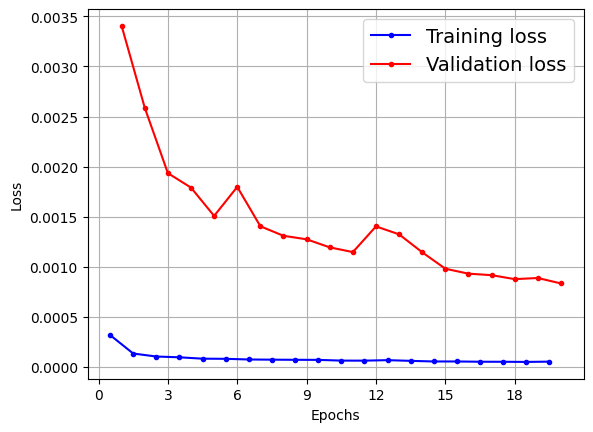

In [157]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(Simple_History.history["loss"], Simple_History.history["val_loss"])
plt.show()

20/20 [==============================] - 0s 2ms/step


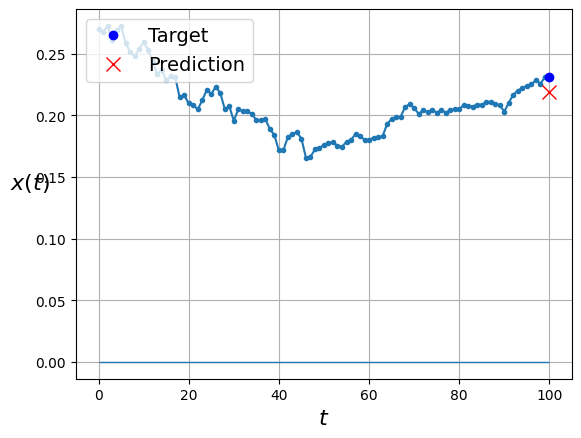

In [158]:
simple_y_pred = Simple_Model.predict(x_valid)
plot_series(x_valid[0, :, 0], y_valid[0, 0], simple_y_pred[0, 0])
plt.show()

In [101]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming all CSV files are named csv1.csv, csv2.csv, ..., csv14.csv
csv_files =  ("AAPL", "ADBE", "AMZN", "CRM", "CSCO", "GOOGL", "IBM", "INTC", "META", "MSFT", "NFLX", "NVDA", "ORCL", "TSLA")

# Initialize an empty list to store the stock data arrays
data_arrays = []

dfs = []
for x in csv_files:
    path = Path(x + ".csv")
    df = pd.read_csv(path, parse_dates=["Date"])
    df["Date"] = pd.to_datetime(df["Date"])
    dfs.append(df)

latest_start = None
earliest_end = None

for df in dfs:
    end_date = pd.to_datetime(df["Date"].max())
    start_date = pd.to_datetime(df["Date"].min())

    # Update the latest start date if necessary
    if latest_start is None or start_date > latest_start:
      latest_start = start_date

    if earliest_end is None or end_date < end_date:
      earliest_end = end_date



for df in dfs:
    # Assuming the stock data includes features: open, close, high, low, volume (adjust as needed)
    df = df[df['Date'] >= latest_start]
    df = df[df['Date'] <= earliest_end]
    stock_data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values.astype(float)

    # Normalize the data (optional but recommended for training neural networks)


    # Reshape the data to (X days, number of features)
    # where X is the number of rows (days) and number of features is 6
    stock_data = stock_data.reshape(-1, 6)

    # Append the reshaped data to the list
    data_arrays.append(stock_data)

# Stack the data arrays along the first axis to create a single numpy array
# with the shape (14, X days, number of features)
stock_data_array = np.stack(data_arrays)

stock_data_2d = stock_data_array.reshape(-1, stock_data_array.shape[-1])

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(stock_data_2d)

# Reshape the normalized data back to 3D array
normalized_stock_data_array = normalized_data.reshape(stock_data_array.shape)

# Print the shape of the final array
print(normalized_stock_data_array.shape)


(14, 2672, 6)


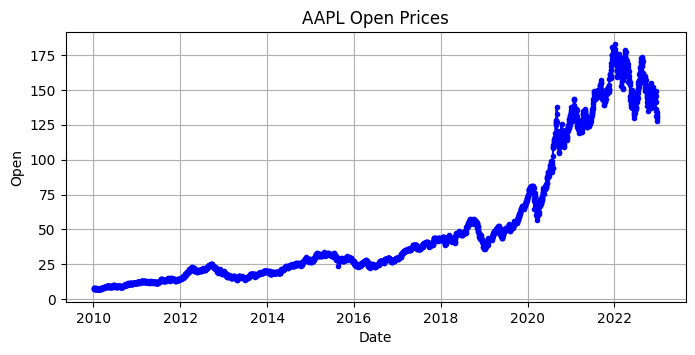

In [102]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming dfs["AAPL"] is your DataFrame containing stock data

# Set the specific start date
start_date = pd.to_datetime("2010-01-04")

# Filter the DataFrame to include data from the start date onwards
filtered_data = dfs[0][dfs[0]["Date"] >= "2010-01-04"]

# Plot the filtered data
plt.figure(figsize=(8, 3.5))
plt.plot(filtered_data["Date"], filtered_data["Open"], marker=".", linestyle="-", color="b")
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("AAPL Open Prices")

plt.show()



In [103]:
close_prices = normalized_stock_data_array[:, :, 3]  # Assuming "Close" price is the fourth feature (index 3)

# For simplicity, let's assume X days is the same for all stocks
n_days = close_prices.shape[1]

X_train, y_train = normalized_stock_data_array[:11, :n_days], normalized_stock_data_array[:11, 3]
X_valid, y_valid = normalized_stock_data_array[11:13, :n_days], normalized_stock_data_array[11:13, 3]
X_test, y_test = normalized_stock_data_array[13:, :n_days], normalized_stock_data_array[13:, 3]

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11, 2672, 6)
y_train shape: (11, 6)
X_valid shape: (2, 2672, 6)
y_valid shape: (2, 6)
X_test shape: (1, 2672, 6)
y_test shape: (1, 6)


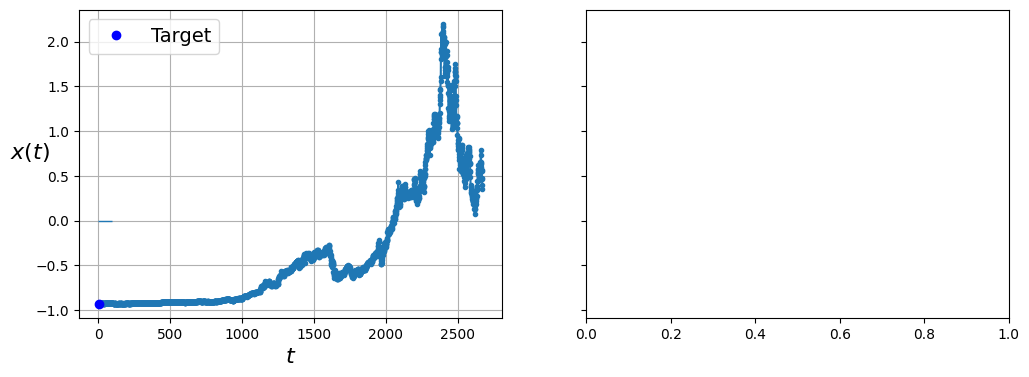

In [104]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 4))
for col in range(1):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))

plt.show()

In [105]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[1870, 6])
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_15" is incompatible with the layer: expected shape=(None, 1870, 6), found shape=(None, 2672, 6)


In [ ]:
import matplotlib as mpl

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

model.evaluate(X_valid, y_valid)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[1, :, 3], y_valid[0, 0], y_pred[0, 0])
plt.show()